In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv("C:\\Users\\Umang\\Downloads\\Kaggle\\Titanic\\train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.shape

(891, 12)

In [5]:
df_test = pd.read_csv("C:\\Users\\Umang\\Downloads\\Kaggle\\Titanic\\test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
df_train.info() #age and cabin seems to have some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

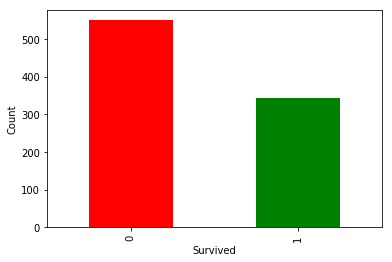

In [6]:
df_train["Survived"].value_counts().plot(kind='bar',color='rg')
plt.ylabel('Count')
plt.xlabel('Survived')
plt.show()

In [7]:
df_train["Survived"].sum()/df_train["Survived"].count()*100

38.383838383838381

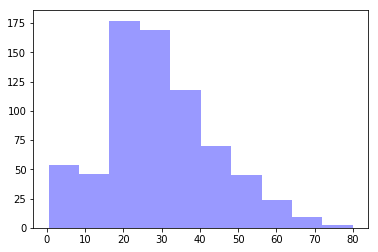

In [8]:
#38% of passengers sutvived
#s = pd.Series(df_train["Age"]) 
plt.hist(df_train["Age"].dropna(), bins=10, alpha=0.4, facecolor='b')
plt.show()

In [56]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

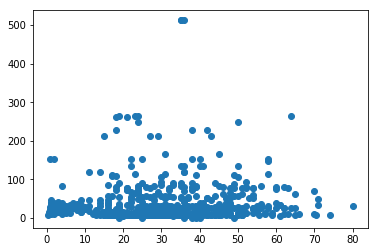

In [58]:
plt.scatter(df_train['Age'], df_train['Fare'])
plt.show()

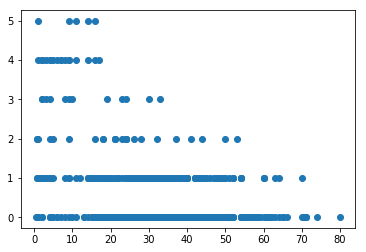

In [59]:
plt.scatter(df_train['Age'], df_train['SibSp'])
plt.show()

In [72]:
ax = pd.crosstab(index=df_train["Survived"], columns=df_train["Pclass"], margins=True,)
ax.columns = ["class 1", "class 2", "class 3", "RowTotal"]
ax.index = ["Not Survived", "Survived", "ColomnTotal"]
ax

,class 1,class 2,class 3,RowTotal
Not Survived,80,97,372,549
Survived,136,87,119,342
ColomnTotal,216,184,491,891


In [74]:
ax*100/ax.loc["ColomnTotal"]

,class 1,class 2,class 3,RowTotal
Not Survived,37.037037,52.717391,75.763747,61.616162
Survived,62.962963,47.282609,24.236253,38.383838
ColomnTotal,100.000000,100.000000,100.000000,100.000000


In [70]:
#only 24% passengers of class 3 survived as compared to 63% of class 1 
bx = pd.crosstab(index=df_train["Survived"], columns=df_train["Sex"], margins=True,)
bx.columns = ["female", "male", "RowTotal"]
bx.index = ["Not Survived", "Survived", "ColomnTotal"]
bx

,female,male,RowTotal
Not Survived,81,468,549
Survived,233,109,342
ColomnTotal,314,577,891


In [75]:
bx*100/bx.loc["ColomnTotal"]

,female,male,RowTotal
Not Survived,25.796178,81.109185,61.616162
Survived,74.203822,18.890815,38.383838
ColomnTotal,100.000000,100.000000,100.000000


In [78]:
#74% of female passengers survived as compared to only 19% of male.
cx = pd.crosstab(index=df_train["Survived"], columns=df_train["Embarked"], margins=True,)
cx.columns = ["Cherbourg", "Queenstown", "Southampton", "RowTotal"]
cx.index = ["Not Survived", "Survived", "ColomnTotal"]
cx

,Cherbourg,Queenstown,Southampton,RowTotal
Not Survived,75,47,427,549
Survived,93,30,217,340
ColomnTotal,168,77,644,889


In [79]:
cx*100/cx.loc["ColomnTotal"]

,Cherbourg,Queenstown,Southampton,RowTotal
Not Survived,44.642857,61.038961,66.304348,61.754781
Survived,55.357143,38.961039,33.695652,38.245219
ColomnTotal,100.000000,100.000000,100.000000,100.000000


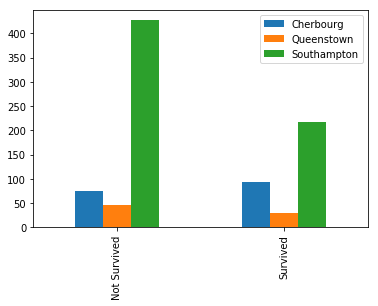

In [86]:
cx = pd.crosstab(index=df_train["Survived"], columns=df_train["Embarked"])
cx.columns = ["Cherbourg", "Queenstown", "Southampton"]
cx.index = ["Not Survived", "Survived"]
cx.plot(kind='bar', stacked=False)
plt.show()


In [62]:
dx = pd.crosstab(index=[df_train['Sex'], df_train['Pclass']], columns=df_train['Survived'], margins=True, values=df_train["Survived"], aggfunc='mean')
dx.columns = ["Not Survived", "Survived", "RowTotal"]
dx
#approximately 97% of female from class one survived


Not Survived  Survived  RowTotal
Sex    Pclass                                  
female 1                0.0       1.0  0.968085
       2                0.0       1.0  0.921053
       3                0.0       1.0  0.500000
male   1                0.0       1.0  0.368852
       2                0.0       1.0  0.157407
       3                0.0       1.0  0.135447
All                     0.0       1.0  0.383838

In [63]:
dx = pd.crosstab(index=[df_train['Sex'], df_train['Pclass']], columns=df_train['Survived'], margins=True, values=df_train["Survived"], aggfunc='count')
dx.columns = ["Not Survived", "Survived", "RowTotal"]
dx

Not Survived  Survived  RowTotal
Sex    Pclass                                  
female 1                3.0      91.0      94.0
       2                6.0      70.0      76.0
       3               72.0      72.0     144.0
male   1               77.0      45.0     122.0
       2               91.0      17.0     108.0
       3              300.0      47.0     347.0
All                   549.0     342.0     891.0

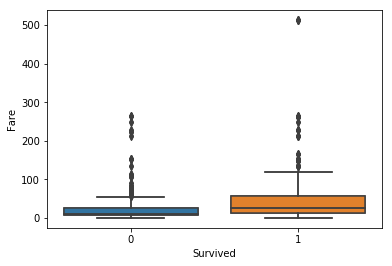

In [10]:
import seaborn as sns
bp = sns.boxplot(x="Survived", y="Fare", data=df_train)
bp
plt.show()

In [19]:
df_train['Fare'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

In [88]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


In [97]:
new_df_train = df_train.copy()
new_df_train.dropna(subset=['Age','Embarked'], how='any', inplace=True)
print(new_df_train.isnull().sum())
print(new_df_train.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
Age_bin          0
dtype: int64
(712, 13)


In [82]:
new_df_test = df_test.copy()
new_df_test.shape

(418, 12)

In [83]:
print(new_df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_bin         86
dtype: int64


In [79]:
#new_df_test.dropna(subset=['Age','Fare'], how='any', inplace=True)
#print(new_df_test.isnull().sum())

In [90]:
new_df_test.shape

(418, 12)

In [143]:
sex = pd.get_dummies(new_df_train['Sex'], drop_first=True)
embark = pd.get_dummies(new_df_train['Embarked'],drop_first=True)
new_df_train.drop(['Sex', 'Embarked','PassengerId', 'Name', 'Ticket', 'Cabin','Age'], axis=1, inplace=True)
new_df_train = pd.concat([new_df_train,sex,embark], axis=1)
new_df_train.dropna(inplace=True)
new_df_train.info()

KeyError: 'Sex'

In [146]:
new_df_train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_bin,male,Q,S
0,0,3,1,0,7.2500,3.0,1,0,1
1,1,1,1,0,71.2833,4.0,0,0,0
2,1,3,0,0,7.9250,3.0,0,0,1
3,1,1,1,0,53.1000,4.0,0,0,1
4,0,3,0,0,8.0500,4.0,1,0,1


In [116]:
new_df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Age_bin,male,Q,S
0,3,34.5,0,0,7.8292,4.0,1,1,0
1,3,47.0,1,0,7.0000,5.0,0,0,1
2,2,62.0,0,0,9.6875,7.0,1,1,0
3,3,27.0,0,0,8.6625,3.0,1,0,1
4,3,22.0,1,1,12.2875,3.0,0,0,1


In [115]:
sex = pd.get_dummies(new_df_test['Sex'], drop_first=True)
embark = pd.get_dummies(new_df_test['Embarked'], drop_first=True)
new_df_test.drop(['Sex', 'Embarked','PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
new_df_test = pd.concat([new_df_test,sex,embark], axis=1)
new_df_test.dropna(inplace=True)
new_df_test.info()

KeyError: 'Sex'

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X_train = new_df_train.drop(['Survived'], axis=1)
y_train = new_df_train['Survived']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))

X_test_scaled = scaler.transform(new_df_test)

print(X_test_scaled.mean(axis=0))


[ -1.39713459e-16  -1.49692992e-17   1.49692992e-17  -6.73618464e-17
  -1.24744160e-16  -3.74232480e-17   1.74641824e-17   1.28486485e-16]


ValueError: operands could not be broadcast together with shapes (331,9) (8,) (331,9) 

In [38]:
k_range = range(1, 26)
weight_options = ['uniform', 'distance']


In [40]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()

In [119]:
from sklearn.model_selection import GridSearchCV 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 26), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [137]:
print(round(grid.best_score_*100,2),'%')
print(grid.best_params_)

80.48 %
{'n_neighbors': 14, 'weights': 'uniform'}


In [127]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn.fit(X_train_scaled,y_train)

pred = knn.predict(X_test_scaled)
pred


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0,

In [128]:
X_test_scaled.shape

(331, 9)

In [147]:
new_df_train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_bin,male,Q,S
0,0,3,1,0,7.2500,3.0,1,0,1
1,1,1,1,0,71.2833,4.0,0,0,0
2,1,3,0,0,7.9250,3.0,0,0,1
3,1,1,1,0,53.1000,4.0,0,0,1
4,0,3,0,0,8.0500,4.0,1,0,1


In [142]:
new_df_test_id = df_test.copy()
new_df_test_id.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0


In [72]:
new_df_test_id.dropna(subset=['Age','Fare'], how='any', inplace=True)
print(new_df_test_id.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
Age_bin          0
dtype: int64


In [73]:
new_df_test_id.shape

(331, 12)

In [78]:
my_submission = pd.DataFrame({'PassengerID': new_df_test_id["PassengerId"],'Survived': pred})

my_submission.to_csv("C:\\Users\\Umang\\Documents\\submission.csv", index=False)

In [104]:
df_train['Age'].dtype

dtype('float64')

In [108]:
bins = [1,10,20,30,40,50,60,70,80]
age_bins = pd.cut(df_train['Age'], bins, labels=False)
age_bins

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
5      NaN
6      5.0
7      0.0
8      2.0
9      1.0
10     0.0
11     5.0
12     1.0
13     3.0
14     1.0
15     5.0
16     0.0
17     NaN
18     3.0
19     NaN
20     3.0
21     3.0
22     1.0
23     2.0
24     0.0
25     3.0
26     NaN
27     1.0
28     NaN
29     NaN
      ... 
861    2.0
862    4.0
863    NaN
864    2.0
865    4.0
866    2.0
867    3.0
868    NaN
869    0.0
870    2.0
871    4.0
872    3.0
873    4.0
874    2.0
875    1.0
876    1.0
877    1.0
878    NaN
879    5.0
880    2.0
881    3.0
882    2.0
883    2.0
884    2.0
885    3.0
886    2.0
887    1.0
888    NaN
889    2.0
890    3.0
Name: Age, Length: 891, dtype: float64

In [109]:
age_bins =age_bins.to_frame()

In [113]:
df_train = pd.concat([df_train,age_bins],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Age,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0,2.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,3.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,2.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0,3.0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,3.0,3.0
